<a href="https://colab.research.google.com/github/dangduong2806/google-colab/blob/main/tmp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, LSTM, Conv1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving updated_colors.csv to updated_colors.csv


In [ ]:
np.random.seed(10)
data = pd.read_csv("colors1.csv")
names = data["name"]

maxlen = 100
t = Tokenizer(char_level=True)
t.fit_on_texts(names)
tokenized = t.texts_to_sequences(names)
padded_names = sequence.pad_sequences(tokenized, maxlen=maxlen)

In [ ]:
def scale(n):
    return int(n * 255)

In [ ]:
normalized_values = np.column_stack([data["red"], data["green"], data["blue"]])
normalized_values = normalized_values / 255.0

In [ ]:
model = Sequential()
model.add(Conv1D(256, kernel_size=3, activation='relu', input_shape=(maxlen, 3)))
model.add(Bidirectional(LSTM(256, activation='tanh')))
model.add(Dense(128, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(3, activation='sigmoid'))
model.add(Dropout(0.2))

model.compile(optimizer='adam', loss='mae', metrics=['acc'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(np.repeat(padded_names[:, :, np.newaxis], 3, axis=-1),
                    normalized_values,
                    epochs=350,
                    batch_size=512,
                    validation_split=0.20)

Epoch 1/350
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - acc: 0.4096 - loss: 0.3199 - val_acc: 0.5881 - val_loss: 0.2374
Epoch 2/350
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - acc: 0.5266 - loss: 0.2916 - val_acc: 0.6069 - val_loss: 0.2375
Epoch 3/350
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - acc: 0.5192 - loss: 0.2935 - val_acc: 0.6069 - val_loss: 0.2328
Epoch 4/350
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - acc: 0.5259 - loss: 0.2925 - val_acc: 0.6435 - val_loss: 0.2320
Epoch 5/350
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - acc: 0.5274 - loss: 0.2903 - val_acc: 0.6476 - val_loss: 0.2301
Epoch 6/350
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - acc: 0.5521 - loss: 0.2862 - val_acc: 0.6247 - val_loss: 0.2400
Epoch 7/350
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - acc: 0.5363 - loss: 0.2857 - val_acc: 0.6490 - val_loss: 0.2227
Epoch 8/350
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - acc: 0.5551 - loss: 0.2843 - val_acc: 0.6595 - val_loss: 0.2337
Epoch 9/350
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/

In [ ]:
np.random.seed(10)
data = pd.read_csv("updated_colors.csv")
names = data["name"]

maxlen = 100
t = Tokenizer(char_level=True)
t.fit_on_texts(names)
tokenized = t.texts_to_sequences(names)
padded_names = sequence.pad_sequences(tokenized, maxlen=maxlen)

In [ ]:
data

,name,red,green,blue
0,parakeet,174,182,87
1,saddle brown,88,52,1
2,cucumber crush,222,237,215
3,pool blue,134,194,201
4,distance,98,110,130
...,...,...,...,...
29136,zigzag pink,197,192,152
29137,zigzag black,197,192,152
29138,zigzag white,197,192,152
29139,zigzag brown,197,192,152


In [ ]:
normalized_values = np.column_stack([data["red"], data["green"], data["blue"]])
normalized_values = normalized_values / 255.0

In [ ]:
normalized_values

array([[0.68235294, 0.71372549, 0.34117647],
       [0.34509804, 0.20392157, 0.00392157],
       [0.87058824, 0.92941176, 0.84313725],
       ...,
       [0.77254902, 0.75294118, 0.59607843],
       [0.77254902, 0.75294118, 0.59607843],
       [0.77254902, 0.75294118, 0.59607843]])

In [ ]:
history = model.fit(np.repeat(padded_names[:, :, np.newaxis], 3, axis=-1),
                    normalized_values,
                    epochs=15,
                    batch_size=1024,
                    validation_split=0.20)

Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step - acc: 0.5378 - loss: 0.2630 - val_acc: 0.4961 - val_loss: 0.1504
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - acc: 0.5425 - loss: 0.2352 - val_acc: 0.7897 - val_loss: 0.1386
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 237ms/step - acc: 0.5751 - loss: 0.2244 - val_acc: 0.8648 - val_loss: 0.1415
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 244ms/step - acc: 0.5938 - loss: 0.2203 - val_acc: 0.8183 - val_loss: 0.1440
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 239ms/step - acc: 0.6003 - loss: 0.2184 - val_acc: 0.9364 - val_loss: 0.1451
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 246ms/step - acc: 0.6153 - loss: 0.2148 - val_acc: 0.8825 - val_loss: 0.1459
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 244ms/step - acc: 0.6131 - loss: 0.2153 - val_acc: 0.9264 - val_loss: 0.1470
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 244ms/step - acc: 0.6180 - loss: 0.2117 - val_acc: 0.9170 - val_loss: 0.1425
Epoch 9/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 250ms/step

In [ ]:
def plot_rgb(rgb):
    data = [[rgb]]
    plt.figure(figsize=(2, 2))
    plt.imshow(data, interpolation='nearest')
    plt.show()

In [ ]:
def predict(name):
    name = name.lower()
    tokenized = t.texts_to_sequences([name])
    padded = sequence.pad_sequences(tokenized, maxlen=maxlen)
    pred = model.predict(np.repeat(padded[:, :, np.newaxis], 3, axis=-1))[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r, g, b)
    plot_rgb(pred)

Lemon Yellow
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
lemon yellow, R,G,B: 159 153 119


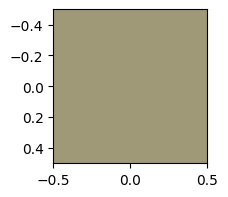

In [ ]:
n = input()
predict(n)

Sky Blue
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
sky blue, R,G,B: 153 154 128


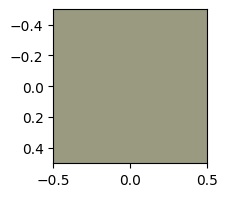

In [ ]:
n = input()
predict(n)

Cucumber
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
cucumber, R,G,B: 172 171 158


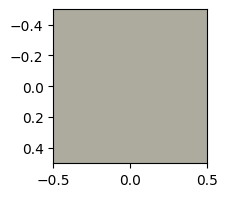

In [ ]:
n = input()
predict(n)

Ocean
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
ocean, R,G,B: 142 124 128


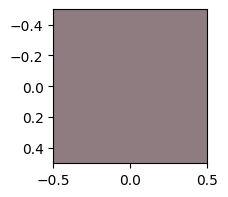

In [ ]:
n = input()
predict(n)

Evaluate

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = np.repeat(padded_names[:, :, np.newaxis], 3, axis=-1)
y_true = normalized_values
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2, random_state=42)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

def evaluate_model():
    # Dự đoán
    y_pred = model.predict(X_test)

    # Tính MAE cho từng kênh R, G, B
    mae_r = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
    mae_g = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
    mae_b = mean_absolute_error(y_test[:, 2], y_pred[:, 2])
    mae_total = mean_absolute_error(y_test, y_pred)

    print("Mean Absolute Error (MAE):")
    print(f"  R: {mae_r:.4f}, G: {mae_g:.4f}, B: {mae_b:.4f}")
    print(f"  Overall: {mae_total:.4f}")

In [ ]:
evaluate_model()

183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Mean Absolute Error (MAE):
  R: 0.1738, G: 0.1615, B: 0.1476
  Overall: 0.1610
